### **Task 1**

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
sample_size = 1000
np.random.seed(42)

# Generate binary conversion data for A and B groups
A = np.random.choice([0, 1], size=sample_size)
B = np.random.choice([0, 1], size=sample_size)

t_stat, p_value = stats.ttest_ind(B, A)

# Interpreting the results
alpha = 0.05
print(f"T-statistic: {round(t_stat,4)}")
print(f"P-value: {round(p_value,4)}")

if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Interpretation: There is a significant difference in conversion rates of A and B.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Interpretation: There is no significant difference in conversion rates of A and B")

T-statistic: -1.6104
P-value: 0.1075
Result: Fail to reject the null hypothesis.
Interpretation: There is no significant difference in conversion rates of A and B


In [ ]:
# Calculating the mean and standard deviation for each group
mean_A = A.mean()
mean_B = B.mean()

std_A = A.std()
std_B = B.std()


confidence_level = 0.95

# Calculate the critical value (for 2-tailed test)
critical_value = stats.t.ppf((1 + confidence_level) / 2, sample_size + sample_size - 2)

# Calculating the standard error for each group
se_A = std_A / np.sqrt(sample_size)
se_B = std_B / np.sqrt(sample_size)

# Calculating the confidence intervals
ci_A = (mean_A - critical_value * se_A,
                   mean_A + critical_value * se_A)

ci_B = (mean_B - critical_value * se_B,
                      mean_B + critical_value * se_B)

print(f"Confidence Interval for Mean A: {ci_A}")
print(f"Confidence Interval for Mean B: {ci_B}")

Confidence Interval for Mean A: (0.4789976663039379, 0.5410023336960621)
Confidence Interval for Mean B: (0.4430334158958367, 0.5049665841041633)


### **Task 2**

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
from PIL import Image
import pytesseract
import regex as re2
import openpyxl

variations = ['@', r'\[at\]', r'\[ät\]', 'at']

def construct_email_pattern(variations):
    # Escape special characters in each variation
    escaped_variations = [re.escape(var) for var in variations]

    # Join variations using the OR (|) operator
    email_pattern = "|".join(escaped_variations)

    # Return the final regex pattern
    return email_pattern

# Function to extract email addresses from text using regex
def extract_emails(text):
    email_pattern = construct_email_pattern(variations)
    full_email_pattern = r"[a-zA-Z0-9._%+-]+" + email_pattern + r"[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
    return re.findall(full_email_pattern, text)

# Function to extract email addresses from an image using pytesseract
def extract_email_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return extract_emails(text)

# Function to scrape email addresses from the Impressum page of a domain
def scrape_email_from_domain(domain):
    url = f"https://{domain}/impressum"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        text = soup.get_text()
        email_addresses = extract_emails(text)
        return email_addresses
    else:
        return None

domains = []
# Create a dictionary to store domain-email pairs
domain_email_dict = {}

# Scrape email addresses from each domain's Impressum page
for domain in domains:
    email_addresses = scrape_email_from_domain(domain)
    if email_addresses:
        domain_email_dict[domain] = email_addresses


image_path = "image_path.jpg"
email_addresses_from_image = extract_email_from_image(image_path)

# Update the dictionary with email addresses from images
if email_addresses_from_image:
    domain_email_dict["Image"] = email_addresses_from_image

# Save the results to an Excel sheet (replace 'output_file.xlsx' with your file path)
output_file = "output_file.xlsx"
output_workbook = openpyxl.Workbook()
output_sheet = output_workbook.active

for i, domain in enumerate(domain_email_dict.keys(), start=1):
    output_sheet.cell(row=i, column=1, value=domain)
    emails = ", ".join(domain_email_dict[domain])
    output_sheet.cell(row=i, column=2, value=emails)

output_workbook.save(output_file)
print("Email addresses extracted and saved to output_file.xlsx")


### **Task 3**

In [ ]:
df = pd.read_csv("retail_services.csv")
df.describe()

,time.index,time.month,time.year,data.inventories.all department stores,data.inventories.all other home furnishings stores,data.inventories.all other merchandise stores,data.inventories.appliances and other electronics stores,data.inventories.auto and other motor vehicles,data.inventories.automobile dealers,data.inventories.automotive parts and tire stores,...,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto",data.sales.shoe stores,data.sales.sporting goods stores,"data.sales.sporting goods, hobby, book, and music stores",data.sales.supermarkets and other grocery (except convenience) stores,data.sales.used car dealers,data.sales.used merchandise stores,data.sales.warehouse clubs and superstores,data.sales.women's clothing stores
count,289.000000,289.000000,289.000000,289.0,289.0,289.0,289.0,289.0,289.0,289.0,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,145.000000,6.480969,2003.543253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242476.089965,211132.491349,2089.602076,2498.768166,6208.961938,25135.124567,5144.723183,861.743945,19464.089965,2957.148789
std,83.571327,3.467180,6.961130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72916.757891,63030.803887,500.439124,934.727674,1815.035633,19902.112653,1631.006836,276.348091,11796.867031,719.518344
min,1.000000,1.000000,1992.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115862.000000,100027.000000,1161.000000,972.000000,3204.000000,0.000000,1583.000000,371.000000,2579.000000,1565.000000
25%,73.000000,3.000000,1998.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,177182.000000,155484.000000,1757.000000,1754.000000,5227.000000,0.000000,4066.000000,702.000000,7758.000000,2440.000000
50%,145.000000,6.000000,2004.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240415.000000,210772.000000,2006.000000,2319.000000,6004.000000,34485.000000,5348.000000,811.000000,19000.000000,2780.000000
75%,217.000000,9.000000,2010.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,301828.000000,260358.000000,2356.000000,3109.000000,6652.000000,41657.000000,6339.000000,983.000000,30329.000000,3415.000000
max,289.000000,12.000000,2016.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,423095.000000,368440.000000,3985.000000,6444.000000,13025.000000,51216.000000,8762.000000,1633.000000,45540.000000,5606.000000


In [ ]:
df.head()

,time.index,time.month,time.month name,time.period,time.year,data.inventories.all department stores,data.inventories.all other home furnishings stores,data.inventories.all other merchandise stores,data.inventories.appliances and other electronics stores,data.inventories.auto and other motor vehicles,...,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto",data.sales.shoe stores,data.sales.sporting goods stores,"data.sales.sporting goods, hobby, book, and music stores",data.sales.supermarkets and other grocery (except convenience) stores,data.sales.used car dealers,data.sales.used merchandise stores,data.sales.warehouse clubs and superstores,data.sales.women's clothing stores
0,1,1,Jan,Jan1992,1992,0,0,0,0,0,...,116565,100872,1206,972,3439,0,1744,371,2579,1873
1,2,2,Feb,Feb1992,1992,0,0,0,0,0,...,115862,100027,1265,1100,3264,0,1990,402,2615,1991
2,3,3,Mar,Mar1992,1992,0,0,0,0,0,...,124200,107352,1463,1214,3473,0,2177,419,2838,2403
3,4,4,Apr,Apr1992,1992,0,0,0,0,0,...,127587,111093,1675,1267,3523,0,2601,393,2984,2665
4,5,5,May,May1992,1992,0,0,0,0,0,...,133608,115960,1560,1293,3545,0,2171,435,3257,2752


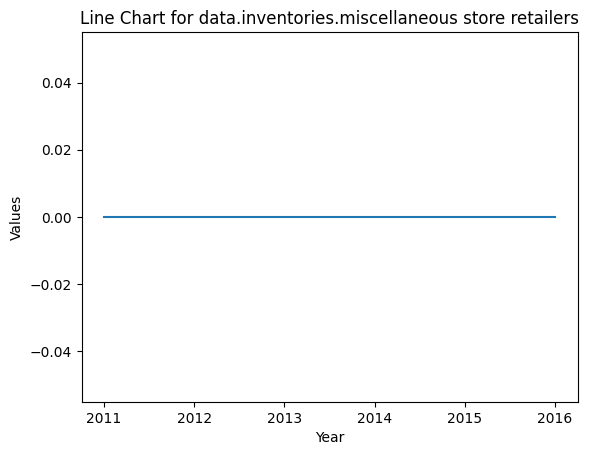

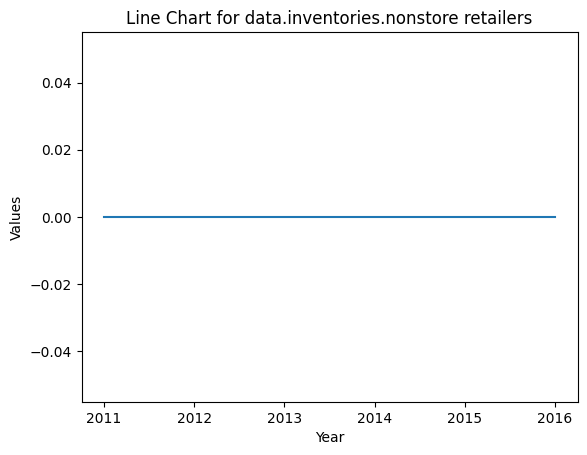

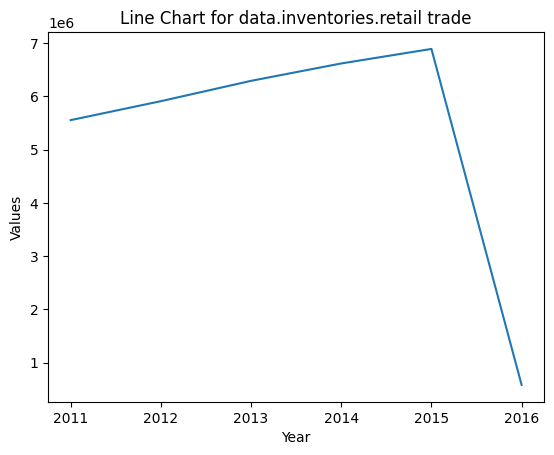

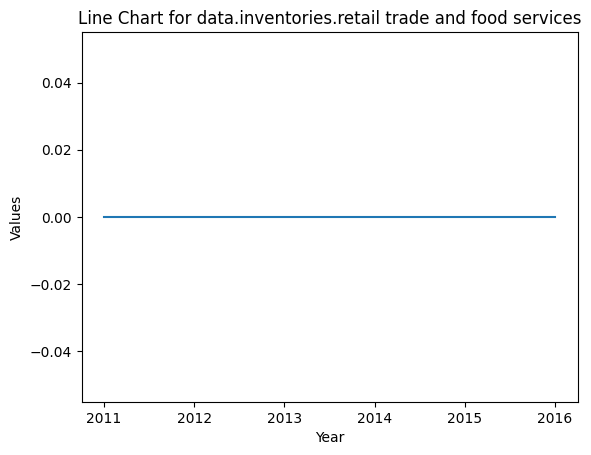

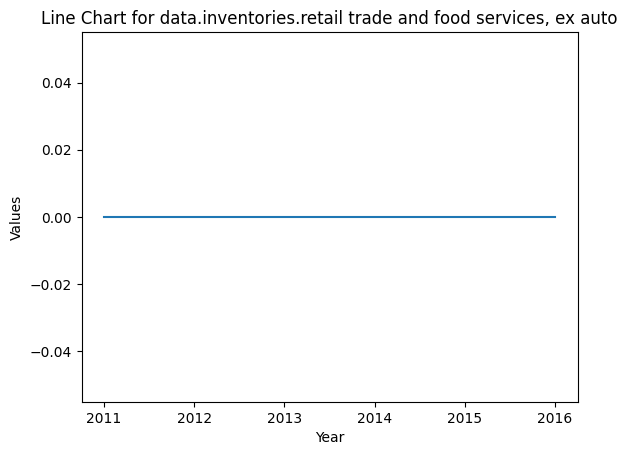

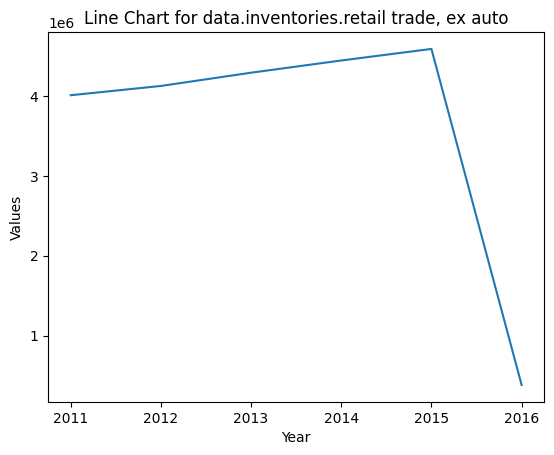

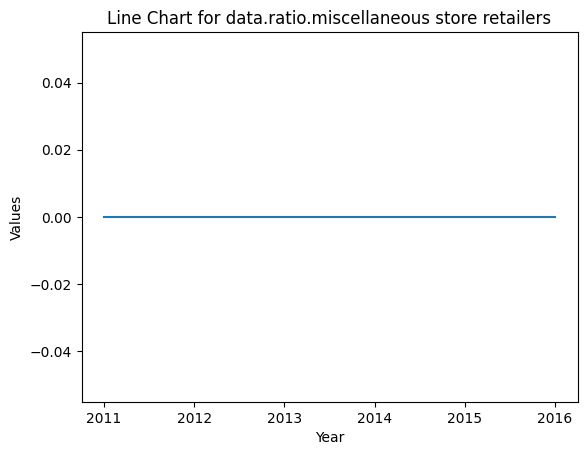

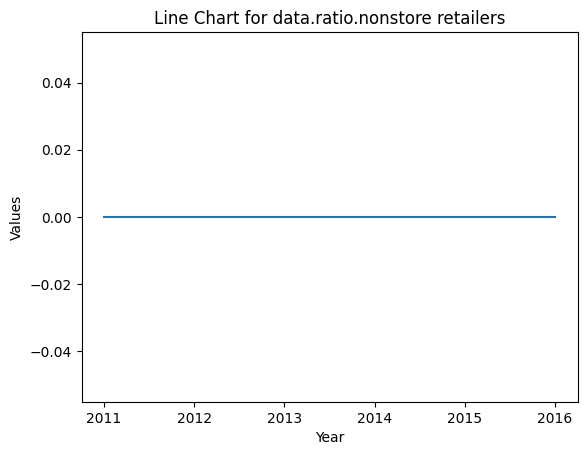

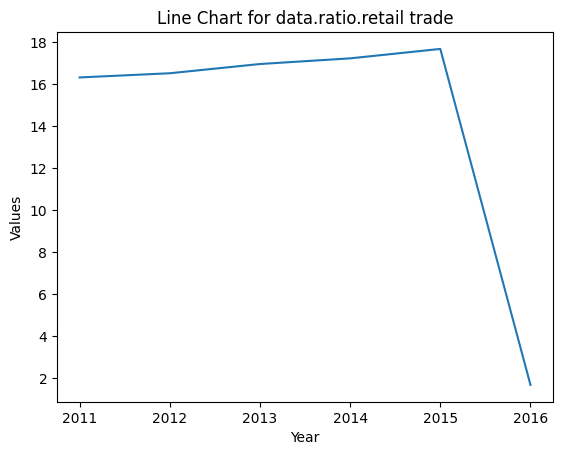

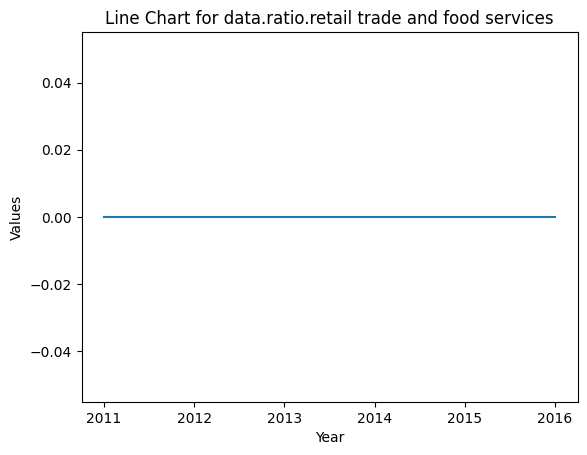

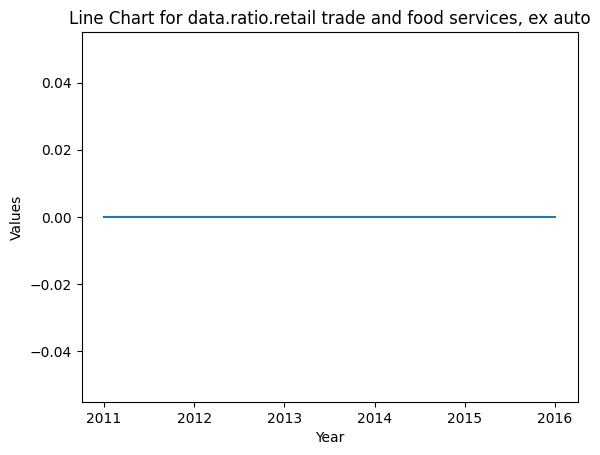

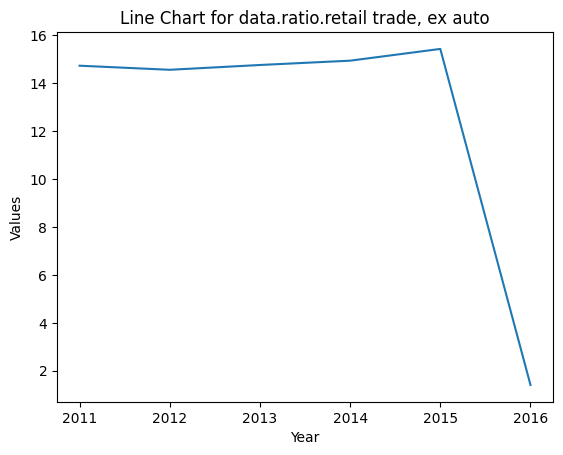

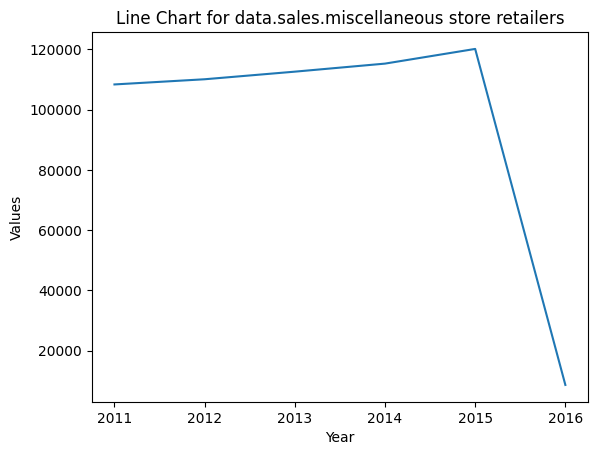

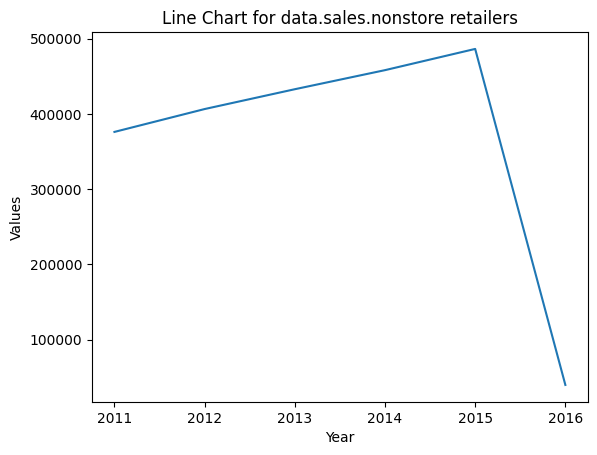

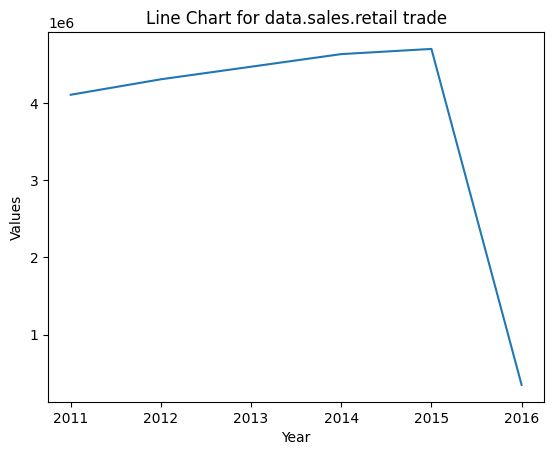

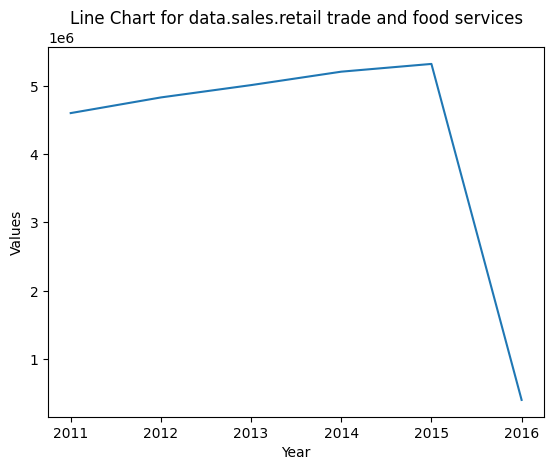

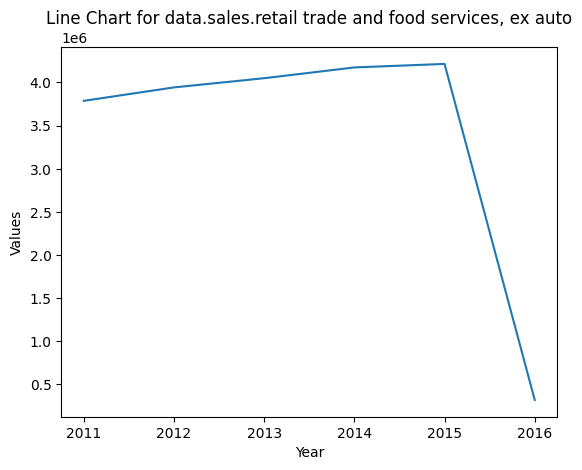

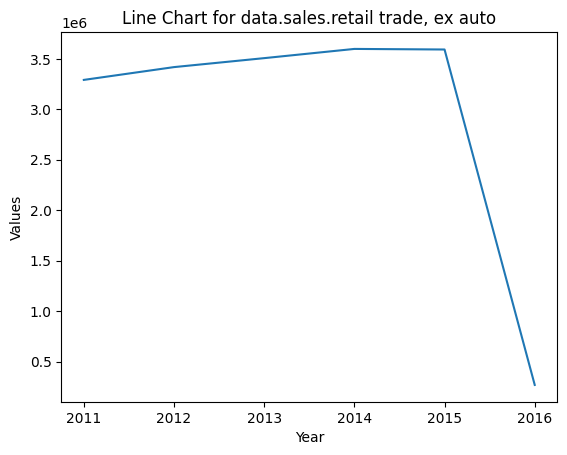

In [ ]:

max_year = max(df['time.year'])
for col in df.columns:
    if 'retail' in col:
        group_data = df[df['time.year'] >= max_year - 5].groupby('time.year')[col].sum()
        plt.plot(group_data.index,group_data.values)
        plt.title(f"Line Chart for {col}")
        plt.xlabel("Year")
        plt.ylabel("Values")
        plt.show()


Over the past 5 years there is a surge retail economic activity in the United States up until 2015 then there's a downfall

## **Differences between the Advance Monthly Retail Trade Survey (MARTS) and the Annual Retail Trade Survey (ARTS)**

MARTS: The Advance Monthly Retail Trade Survey is conducted monthly. It provides more frequent updates on retail sales and economic activity.

ARTS: The Annual Retail Trade Survey is conducted annually. It provides comprehensive data for a full year, offering a more detailed and complete picture of retail performance.
Reporting Period:

In [ ]:
MARTS = df.groupby('time.period')['data.sales.all department stores'].sum()
ARTS = df.groupby('time.year')['data.sales.all department stores'].sum()

In [ ]:
import seaborn as sns

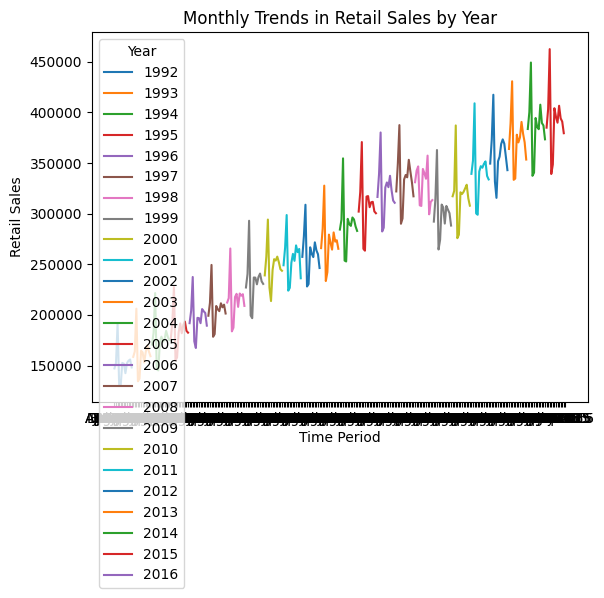

In [ ]:
retail_columns = [col for col in df.columns if 'data.sales.retail' in col]


monthly_trends = df.groupby(['time.year', 'time.period'])[retail_columns].sum()

monthly_trends.reset_index(inplace=True)

for year in monthly_trends['time.year'].unique():
    data_for_year = monthly_trends[monthly_trends['time.year'] == year]
    sns.lineplot(x='time.period', y=retail_columns[0], data=data_for_year, label=str(year))

plt.xlabel('Time Period')
plt.ylabel('Retail Sales')
plt.title('Monthly Trends in Retail Sales by Year')
plt.legend(title='Year', loc='best')

# Display the plot
plt.show()

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

Number of outliers in data.inventories.miscellaneous store retailers : 0
Number of outliers in data.inventories.nonstore retailers : 0
Number of outliers in data.inventories.retail trade : 0
Number of outliers in data.inventories.retail trade and food services : 0
Number of outliers in data.inventories.retail trade and food services, ex auto : 0
Number of outliers in data.inventories.retail trade, ex auto : 0
Number of outliers in data.ratio.miscellaneous store retailers : 0
Number of outliers in data.ratio.nonstore retailers : 0
Number of outliers in data.ratio.retail trade : 0
Number of outliers in data.ratio.retail trade and food services : 0
Number of outliers in data.ratio.retail trade and food services, ex auto : 0
Number of outliers in data.ratio.retail trade, ex auto : 0
Number of outliers in data.sales.miscellaneous store retailers : 22


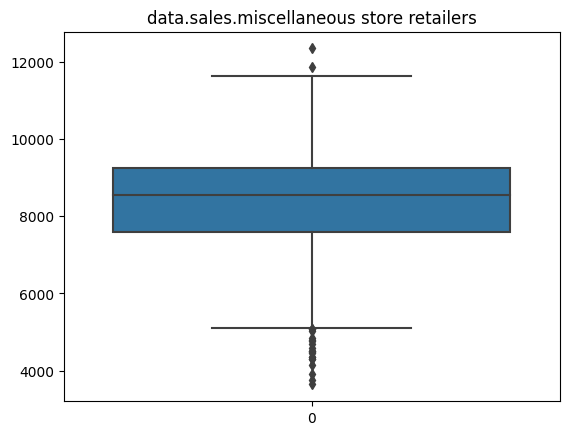

Number of outliers in data.sales.nonstore retailers : 2


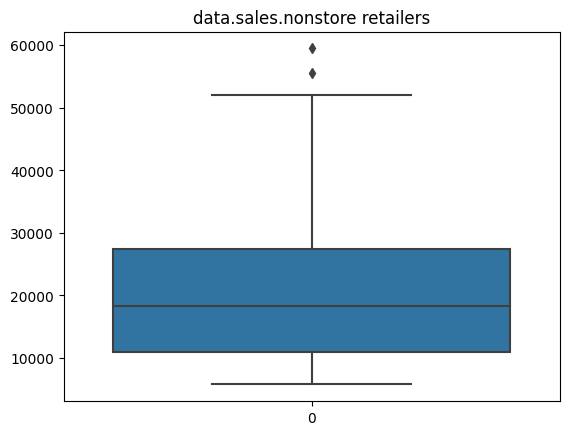

Number of outliers in data.sales.retail trade : 0
Number of outliers in data.sales.retail trade and food services : 0
Number of outliers in data.sales.retail trade and food services, ex auto : 0
Number of outliers in data.sales.retail trade, ex auto : 0


In [ ]:
for col in df.columns:
  if 'retail' in col:
    outliers = find_outliers_IQR(df[col])
    print("Number of outliers in", col, ":",len(outliers))
    if len(outliers)>0:
      sns.boxplot(df[col])
      plt.title(col)
      plt.show()


<ipython-input-7-ce2b1785ca3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail_columns.corr()


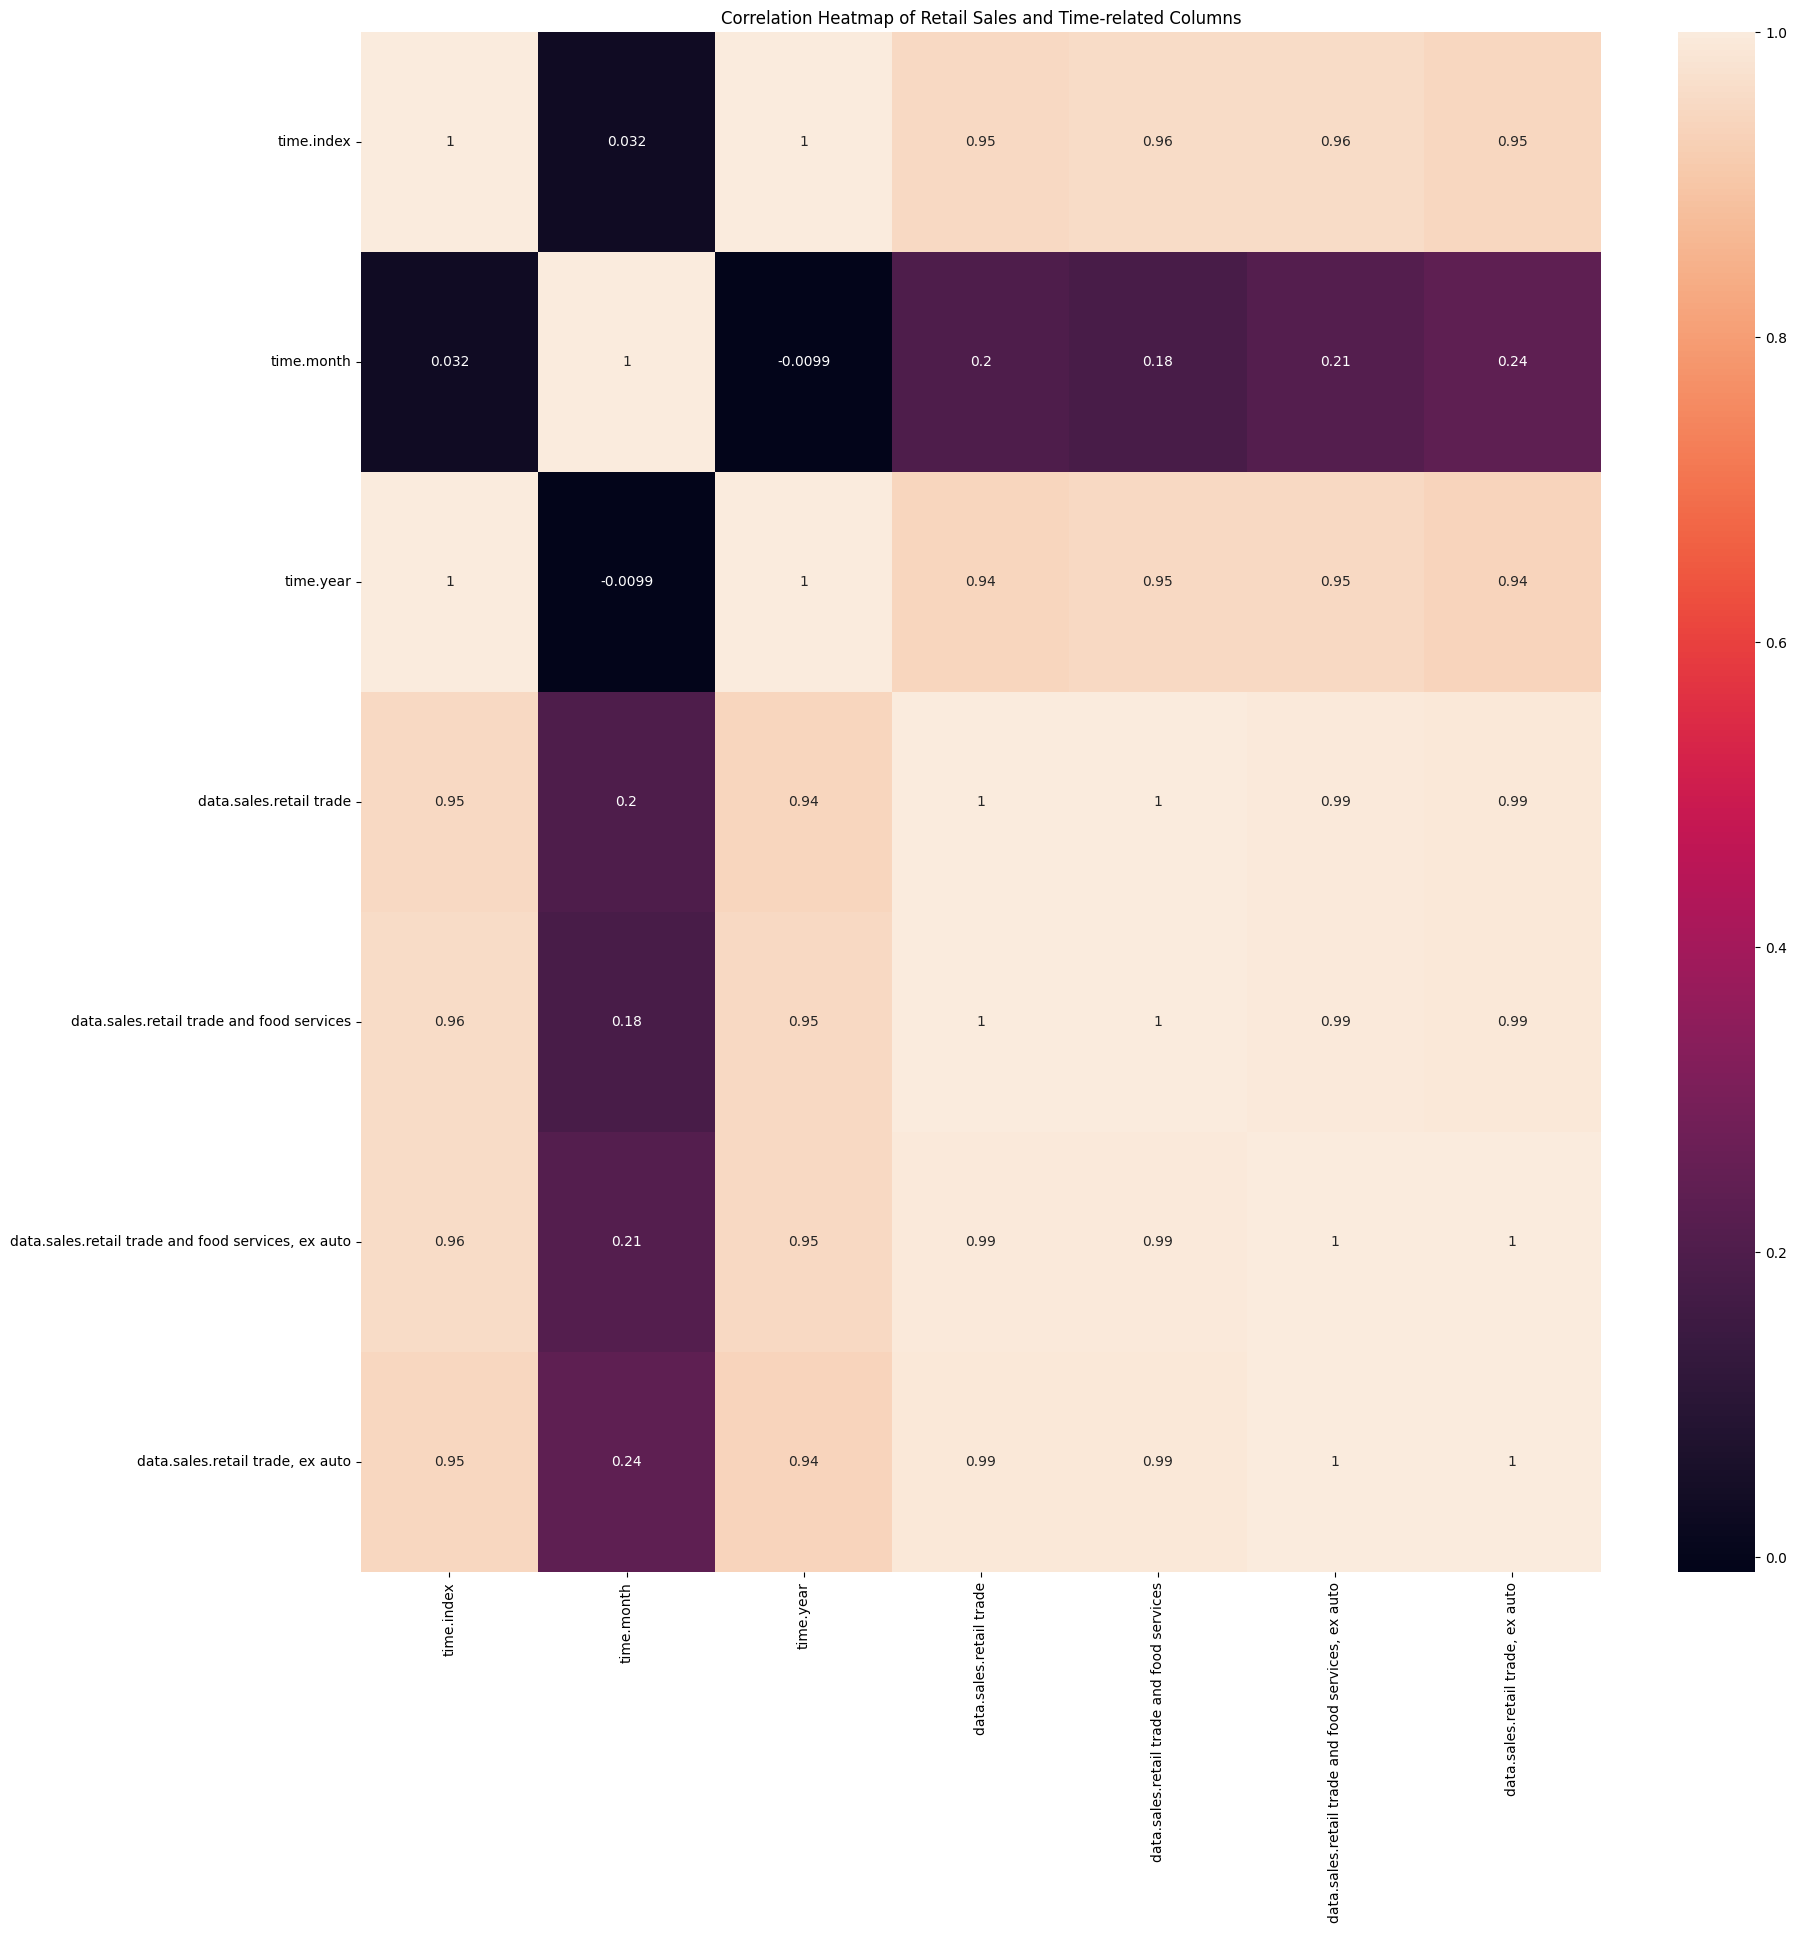

In [ ]:
retail_columns = df[[col for col in df.columns if 'data.sales.retail' in col or 'time' in col]]
correlation_matrix = retail_columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Retail Sales and Time-related Columns')
plt.show()